## Importing Libraries

In [1]:
import time
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, confusion_matrix, roc_curve, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cb
import xgboost as xgb

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

## Data Exporation

In [2]:
rain_data = pd.read_csv("./weatherAUS.csv")

In [3]:
rain_data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
2              No      0.0            No  
3              No      1.0            No  
4              No      0.2            No  
...           ...      ...           ...  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[142193 rows x 24 columns]

#### Exploring the number of rows and columns in the data and the details about what the data is about

In [4]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
rain_data.shape

(142193, 24)

#### We see that that there are two columns 'RainToday' and 'RainTomorrow' which are of type objects with Yes/No values. We will convert them to binary for the convinience of our model

In [6]:
rain_data['RainToday'].replace({'No':0, 'Yes':1}, inplace=True)

In [7]:
rain_data['RainTomorrow'].replace({'No':0, 'Yes':1}, inplace=True)

In [8]:
rain_data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0             0.0      0.0             0  
1             0.0      0.0             0  
2             0.0      0.0             0  
3             0.0      1.0             0  
4             0.0      0.2             0  
...           ...      ...           ...  
142188        0.0      0.0             0  
142189        0.0      0.0             0  
142190        0.0      0.0             0  
142191        0.0      0.0             0  
142192        0.0      0.0             0  

[142193 rows x 24 columns]

#### Checking for data imbalance

In [9]:
def check_imbalance(data):
    imbalance = data['RainTomorrow'].value_counts(normalize=True)
    print(imbalance)
    plt.figure(figsize=(8,5))
    imbalance.plot(kind='bar', color=['red', 'green'], alpha=0.9)
    plt.title('Class Imbalance: 0 -> NO and 1 -> YES')
    plt.show()

0    0.775819
1    0.224181
Name: RainTomorrow, dtype: float64


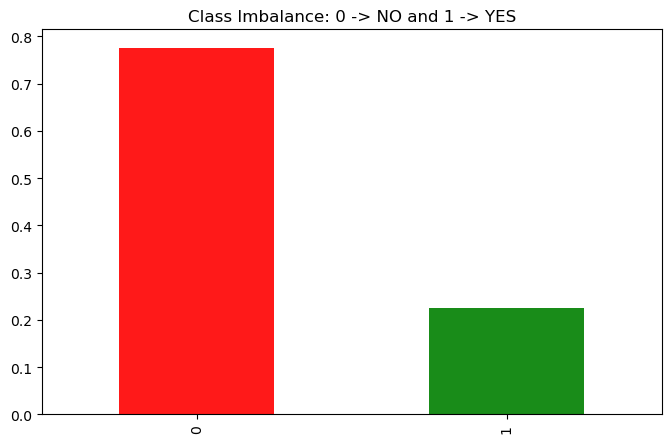

In [10]:
check_imbalance(rain_data)

#### Observation
We see that the class 0 is almost 78% of the data and class 1 is 22% of the data which clearly shows that there is class imbalance in the data. Based on the data statistics, we will oversample the minority class


In [11]:
rain_data.shape

(142193, 24)

In [12]:
smote = SMOTE()
no = rain_data[rain_data.RainTomorrow == 0]
yes = rain_data[rain_data.RainTomorrow == 1]
oversample_yes = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled_data = pd.concat([no, oversample_yes])

In [13]:
oversampled_data.shape

(220632, 24)

0    0.5
1    0.5
Name: RainTomorrow, dtype: float64


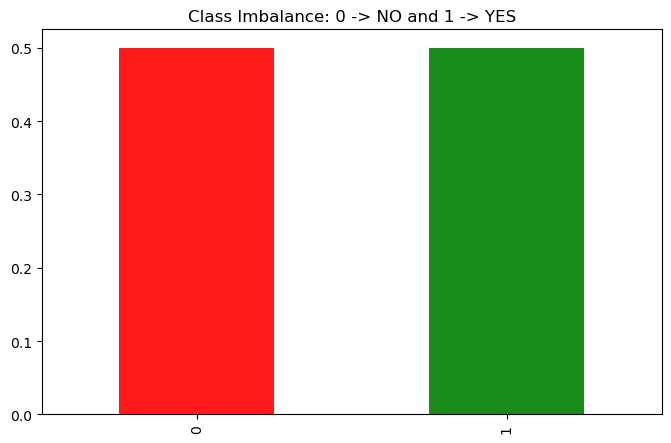

In [14]:
check_imbalance(oversampled_data)

#### Checking missing data

<Axes: >

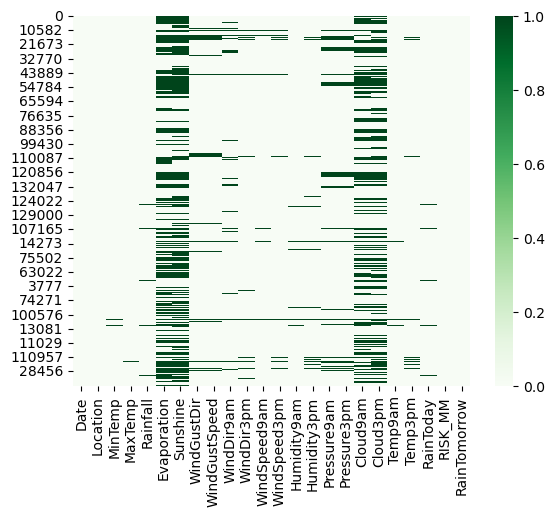

In [15]:
sns.heatmap(oversampled_data.isnull(), cbar=True, cmap='Greens')

In [16]:
total = oversampled_data.isnull().sum().sort_values(ascending=False)
percent = (oversampled_data.isnull().sum()/oversampled_data.count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percentange'])
missing

Total  Percentange
Sunshine       104831     0.905269
Evaporation     95411     0.761941
Cloud3pm        85614     0.634093
Cloud9am        81339     0.583942
Pressure3pm     21746     0.109339
Pressure9am     21728     0.109239
WindGustDir     15491     0.075514
WindGustSpeed   15354     0.074796
WindDir9am      14728     0.071528
WindDir3pm       6440     0.030066
Humidity3pm      6031     0.028103
Temp3pm          4558     0.021095
WindSpeed3pm     4353     0.020127
Humidity9am      3171     0.014582
RainToday        3124     0.014363
Rainfall         3124     0.014363
WindSpeed9am     2206     0.010100
Temp9am          1653     0.007549
MinTemp          1082     0.004928
MaxTemp           471     0.002139
RISK_MM             0     0.000000
Date                0     0.000000
Location            0     0.000000
RainTomorrow        0     0.000000

We notice that the features with the highest percentage of missing values are:
1. Evaporation
2. Sunshine
3. Cloud9am
4. Cloud3pm

We see that these 4 feature have less than 50% of datam issing so we perform data imputation to use these features for our model

## Data Imputation and Transformation

First, we'll replace missing values in categorical columns with the mode, and then convert them into numeric values using label encoding. 

In [17]:
oversampled_data.shape

(220632, 24)

In [18]:
#Impute Categorical variable with Mode
categorical_columns = oversampled_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    val = oversampled_data[col].mode()[0]
    oversampled_data[col] = oversampled_data[col].fillna(val)

In [19]:
#Converting categorical values into numerical values by label encoding
lencoders = {}
for col in categorical_columns:
    lencoders[col] = LabelEncoder()
    oversampled_data[col] = lencoders[col].fit_transform(oversampled_data[col])

In [20]:
oversampled_data.shape

(220632, 24)

After that, we'll use the Multiple Imputation by Chained Equations (MICE) package to handle missing values in the entire dataset.

In [21]:
imputed_data= oversampled_data.copy(deep=True) 
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(oversampled_data)
imputed_data.shape

(220632, 24)

Next, we'll identify outliers using the interquartile range method and eliminate them to obtain the finalized dataset. Finally, we'll examine the correlation among variables, and if we find highly correlated pairs, we'll retain one variable and discard the other.

In [22]:
Q1 = imputed_data.quantile(0.25)
Q3 = imputed_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [23]:
imputed_data.shape

(220632, 24)

In [24]:
imputed_data = imputed_data[~((imputed_data < (Q1 - 1.5 * IQR)) | (imputed_data > (Q3 + 1.5 * IQR))).any(axis=1)]
imputed_data.shape

(156852, 24)

<Axes: >

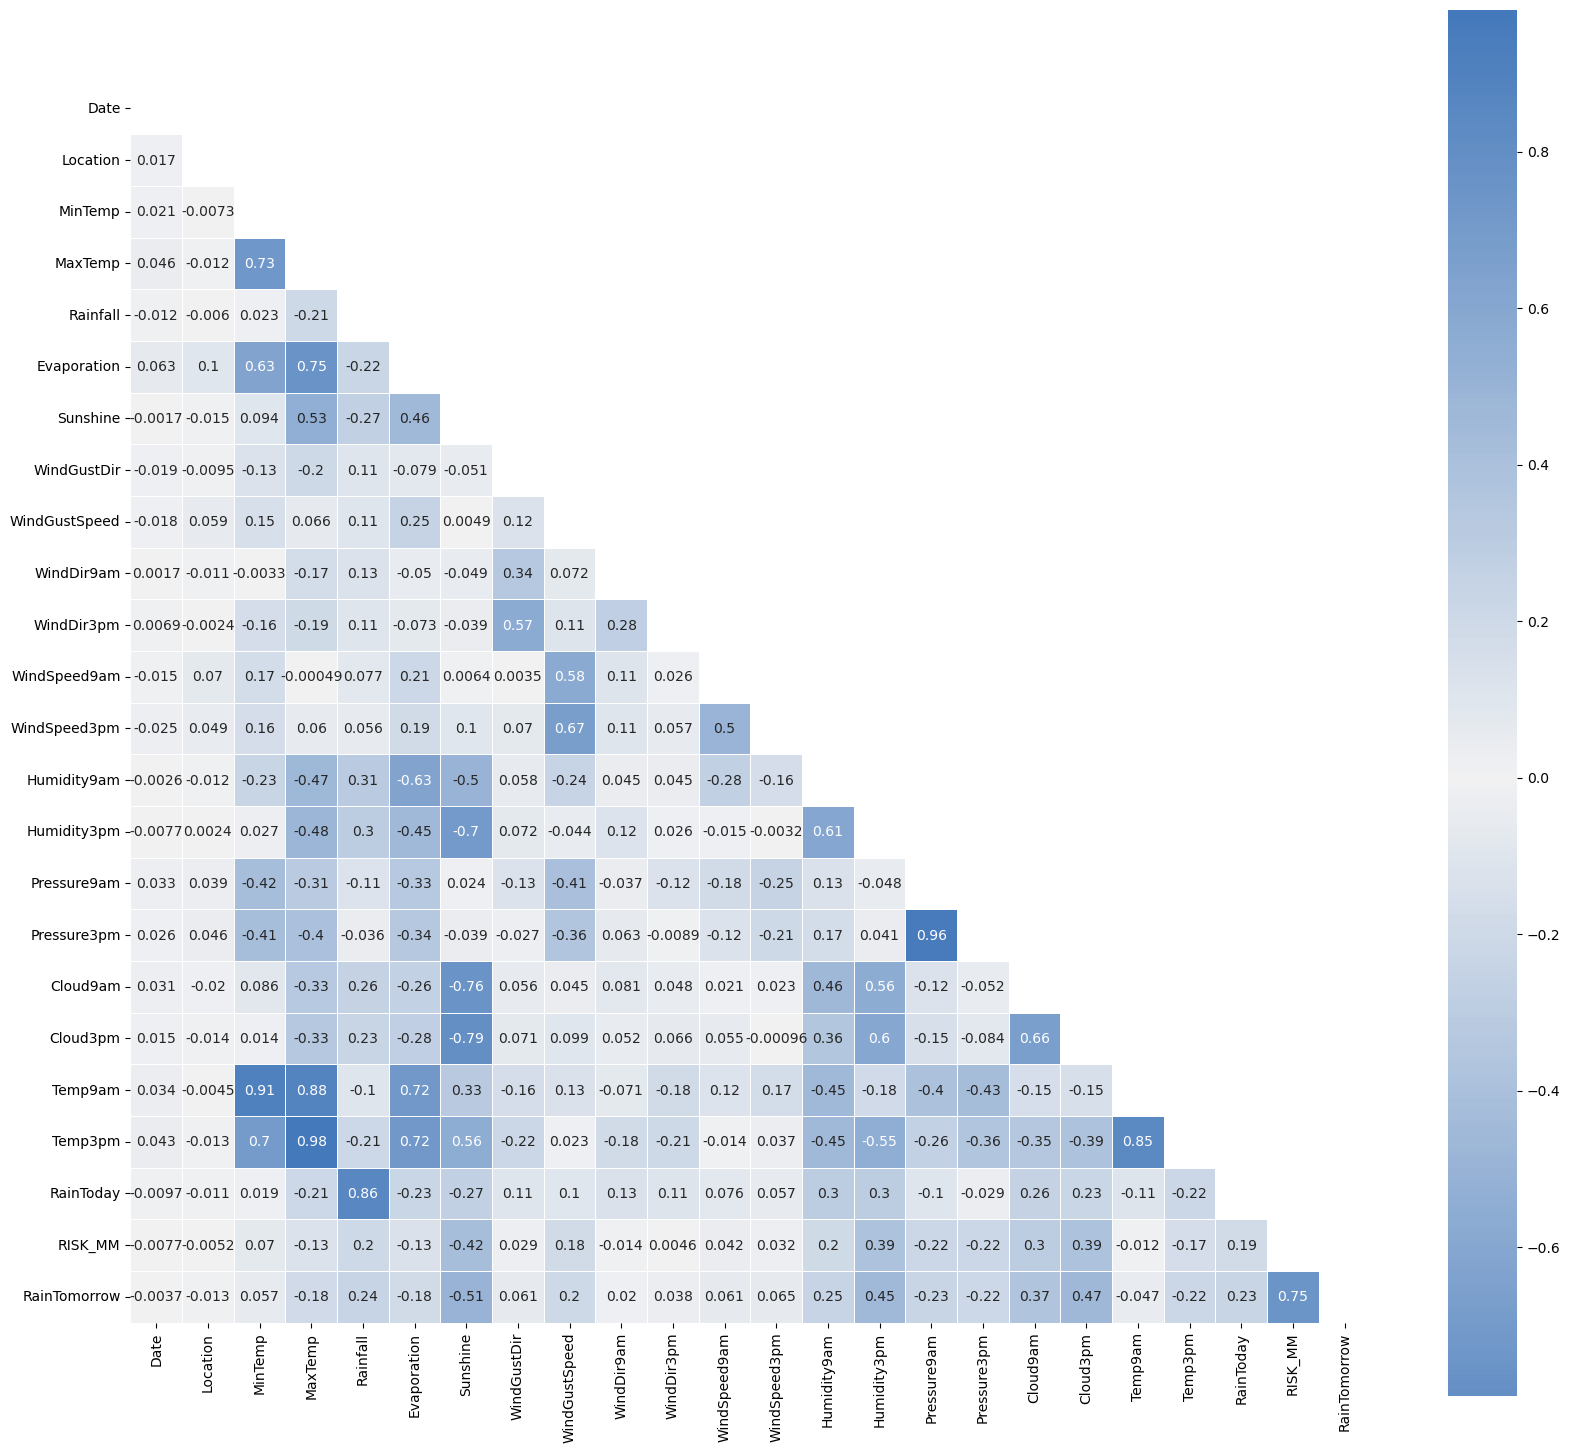

In [25]:
corr = imputed_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

**Observation**
We observe that these 5 pairs have ver strong correlation:
1. MaxTemp and MinTemp
2. Pressure9am and Pressure3pm
3. Temp9am and Temp3pm
4. Evaporation and MaxTemp
5. MaxTemp and Temp3pm

All these pairs have high correlation value but not equal to one which means that they are still important features.

We can further explore the correlation between highly correlated features by analyzing a pair diagram.

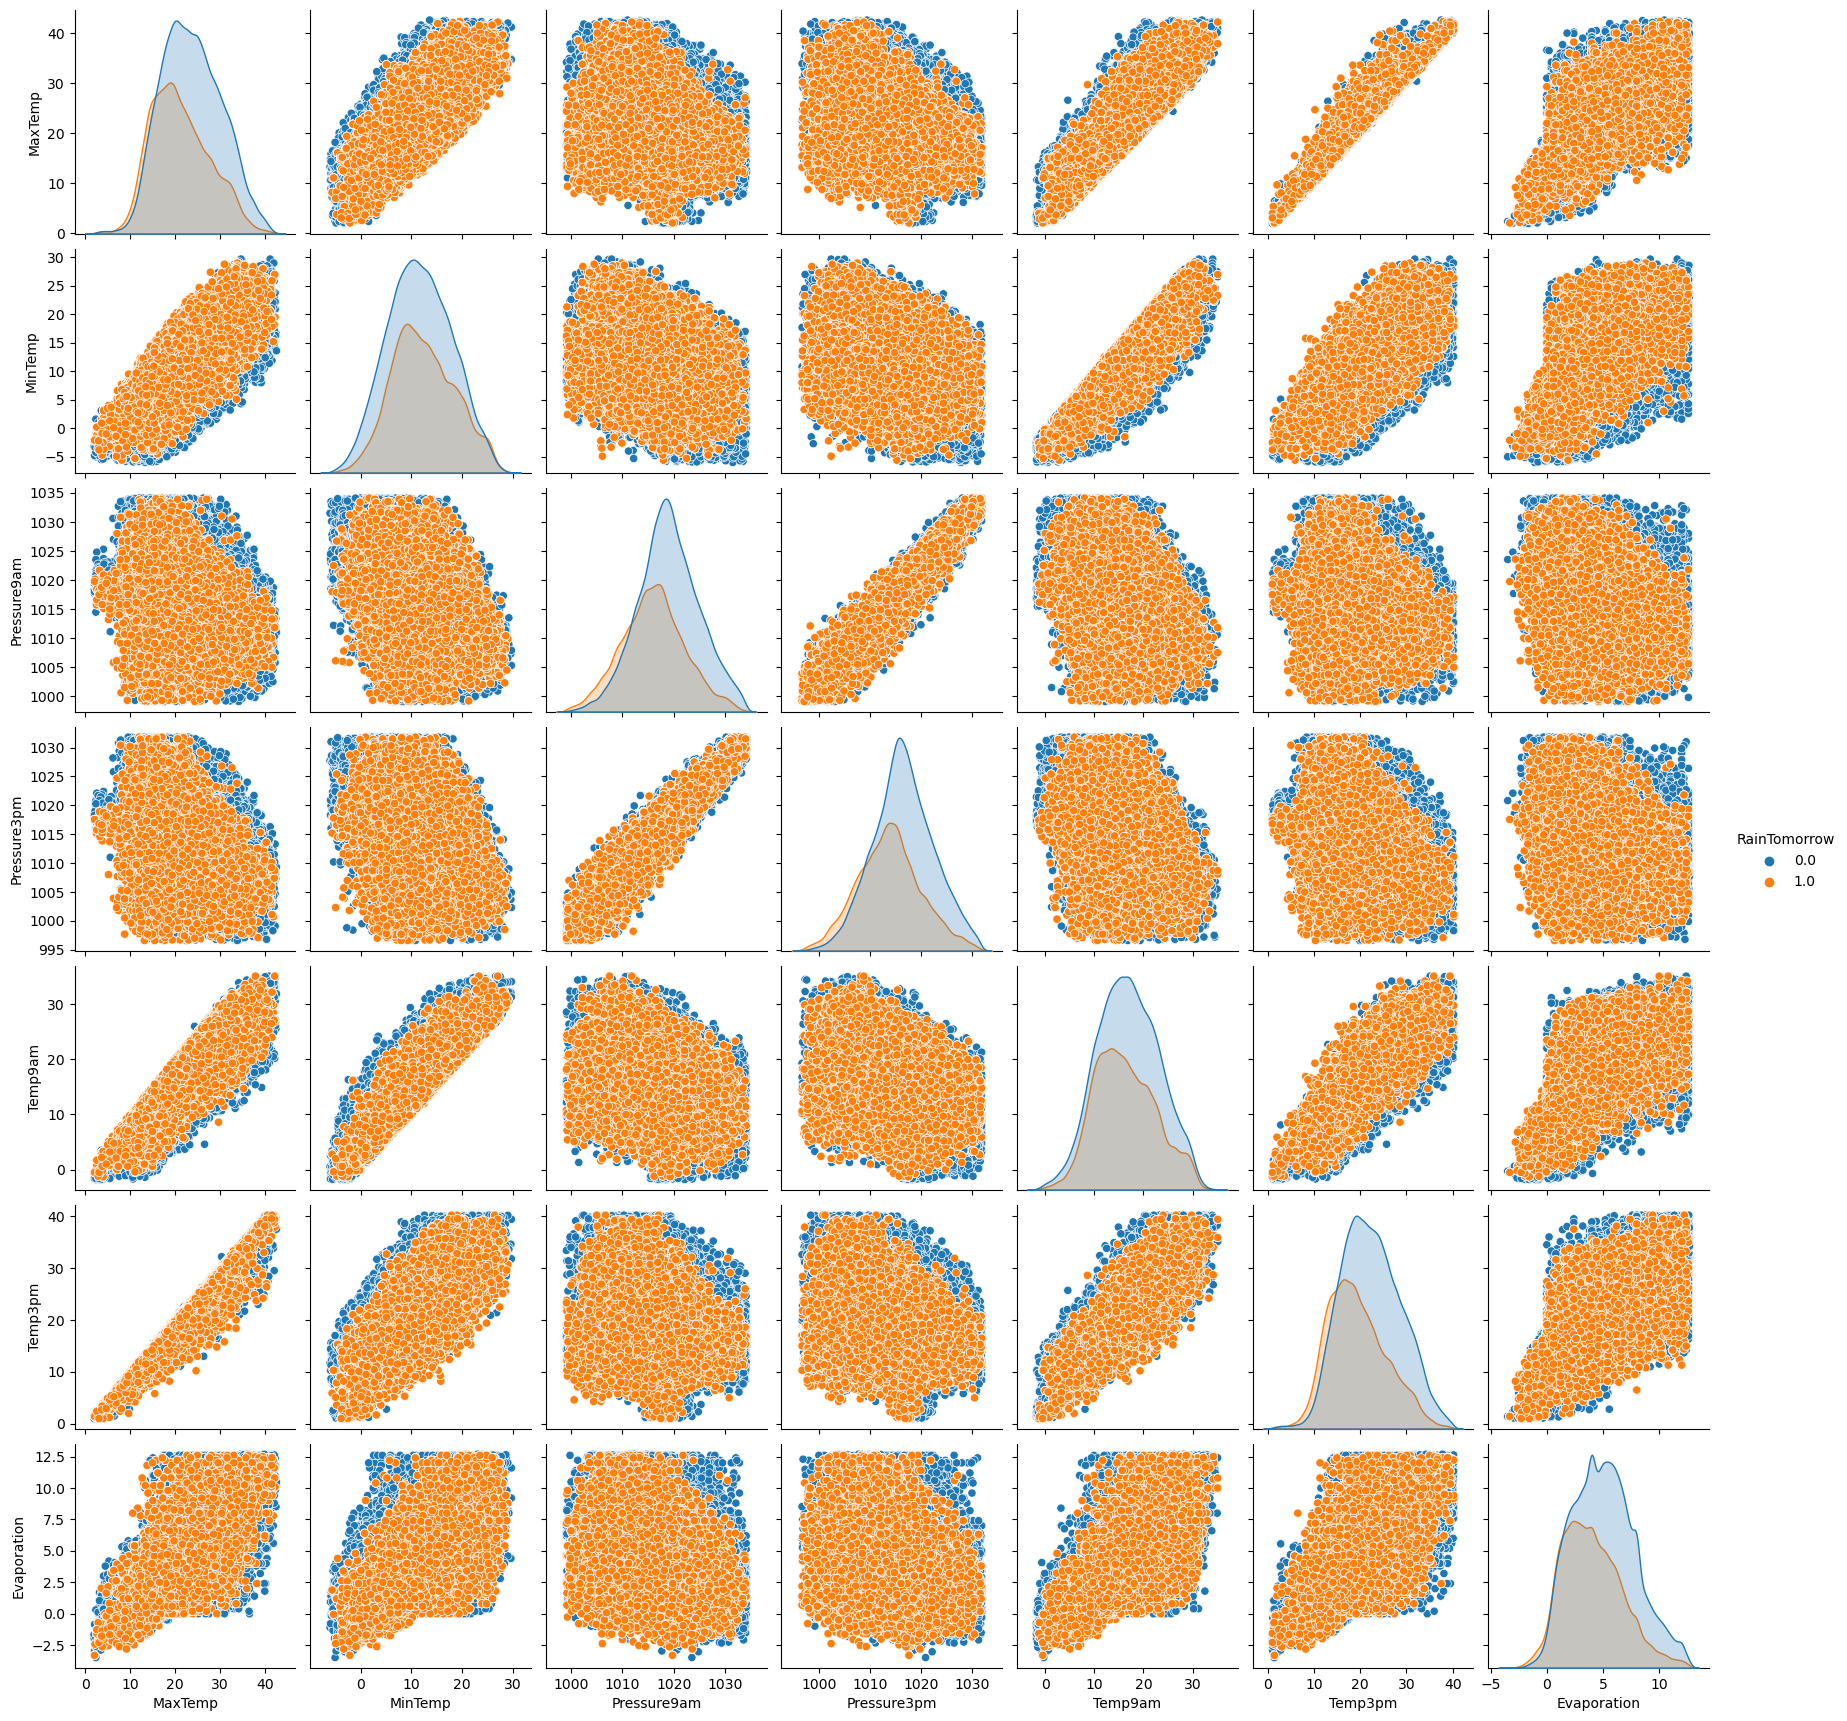

In [26]:
sns.pairplot(data=imputed_data, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow')

In each paired plot, distinct clusters representing "yes" and "no" outcomes of RainTomorrow are evident, with very little overlap between them.

## Feature Selection

In [27]:
def get_features(data, selector):
    X =  data.drop('RainTomorrow', axis=1)
    y = data['RainTomorrow']
    selector.fit(X, y)
    support = selector.get_support(indices=True)
    features = X.columns[support].tolist()
    
    return X, y, features

### Filter method

In [28]:
#normalizing the data
scaler = preprocessing.MinMaxScaler()
scaler.fit(imputed_data)
modified_data = pd.DataFrame(scaler.transform(imputed_data), index=imputed_data.index, columns=imputed_data.columns)

#Feature Selection using Filter method
filter_selector = SelectKBest(chi2, k=10)
X_filt, y_filt, filter_features = get_features(modified_data, filter_selector)
print("Features with higher importance compared to other Features")
print(filter_features)

Features with higher importance compared to other Features
['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM']


### Wrapper Method

In [29]:
wrapper_selector = SelectFromModel(rf(n_estimators=100, random_state=0))
X_wrap, y_wrap, wrapper_features = get_features(imputed_data, wrapper_selector)
print("Features with higher importance compared to other Features")
print(wrapper_features)
print(rf(n_estimators=100, random_state=0).fit(X_wrap,y_wrap).feature_importances_)

Features with higher importance compared to other Features
['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.0020401  0.00215301 0.00258993 0.00369533 0.01024199 0.00252936
 0.05929155 0.00146155 0.00806436 0.00174527 0.00169392 0.00143657
 0.00185125 0.00761014 0.03245904 0.00828576 0.01190347 0.02089268
 0.05051797 0.00269743 0.00512236 0.00359708 0.75811988]


## Training

In [30]:
features = list(set(filter_features + wrapper_features))
features.append('Location')
features.append('RainToday')

features = imputed_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = imputed_data['RainTomorrow']

#Splitting into train(75%) and test(25%) and normalizing the features
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=123)
scaler=StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

### Helper Functions

In [31]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
def plot_confusion_matrix(cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    
    else:
        model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs)
    cm = confusion_matrix(y_test, y_pred)

    plot_roc_cur(fper, tper)
    plot_confusion_matrix(cm)
    
    return model, accuracy, roc_auc, coh_kap, time_taken
   

### 1. Logistic Regression

Accuracy = 0.7863973682197231
ROC Area under Curve = 0.7668888650430052
Cohen's Kappa = 0.5430564924223411
Time taken = 2.0197768211364746
              precision    recall  f1-score   support

         0.0    0.80659   0.85517   0.83017     23939
         1.0    0.74935   0.67860   0.71222     15274

    accuracy                        0.78640     39213
   macro avg    0.77797   0.76689   0.77120     39213
weighted avg    0.78429   0.78640   0.78423     39213



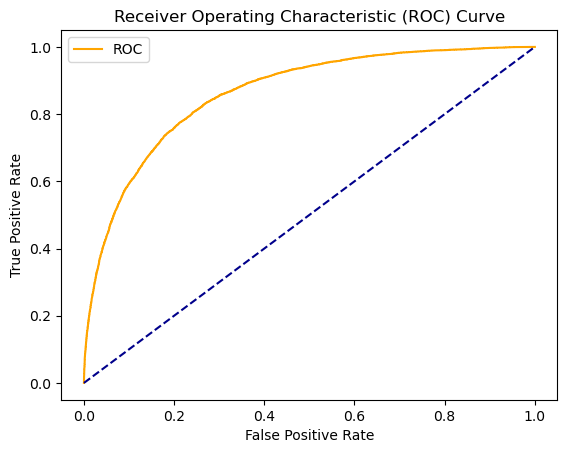

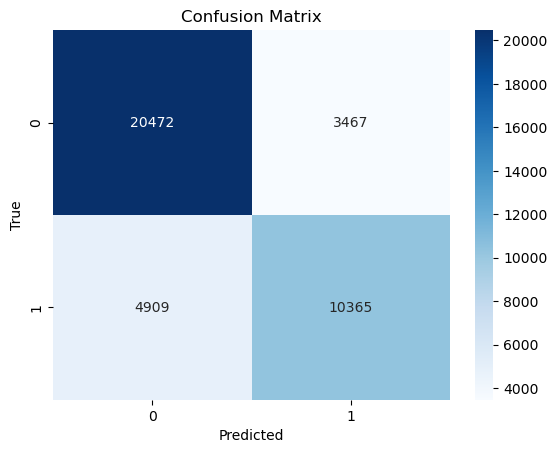

In [32]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}
lr_classifier = LogisticRegression(random_state=42, **params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(lr_classifier, X_train, y_train, X_test, y_test)

### 2. Decision Tree

Accuracy = 0.8618825389539183
ROC Area under Curve = 0.8584535257854405
Cohen's Kappa = 0.7116955543743843
Time taken = 0.4571242332458496
              precision    recall  f1-score   support

         0.0    0.89713   0.87397   0.88540     23939
         1.0    0.81016   0.84294   0.82622     15274

    accuracy                        0.86188     39213
   macro avg    0.85364   0.85845   0.85581     39213
weighted avg    0.86325   0.86188   0.86235     39213



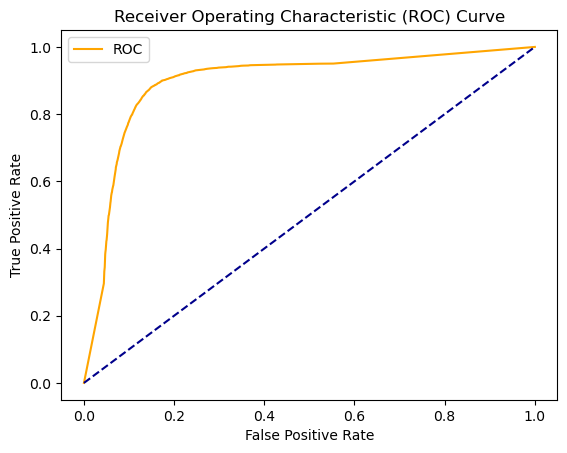

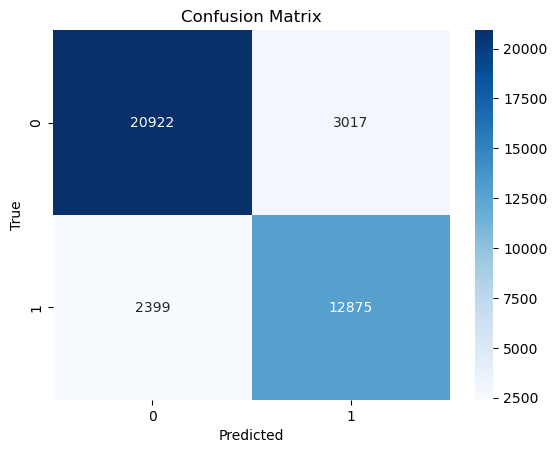

In [33]:
params_dt = {'max_depth': 16, 'max_features': "sqrt"}
dt_classifier = DecisionTreeClassifier(random_state=42, **params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(dt_classifier, X_train, y_train, X_test, y_test)

### 3. Neural Network

Accuracy = 0.8875117945579272
ROC Area under Curve = 0.8833663792027643
Cohen's Kappa = 0.7642425043154228
Time taken = 238.73881316184998
              precision    recall  f1-score   support

         0.0    0.91261   0.90213   0.90734     23939
         1.0    0.84932   0.86461   0.85689     15274

    accuracy                        0.88751     39213
   macro avg    0.88096   0.88337   0.88212     39213
weighted avg    0.88796   0.88751   0.88769     39213



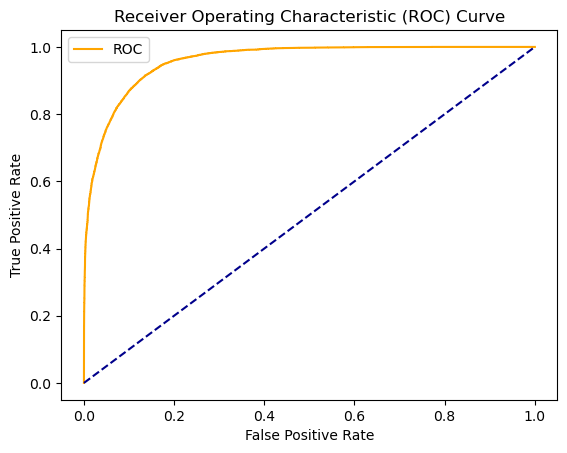

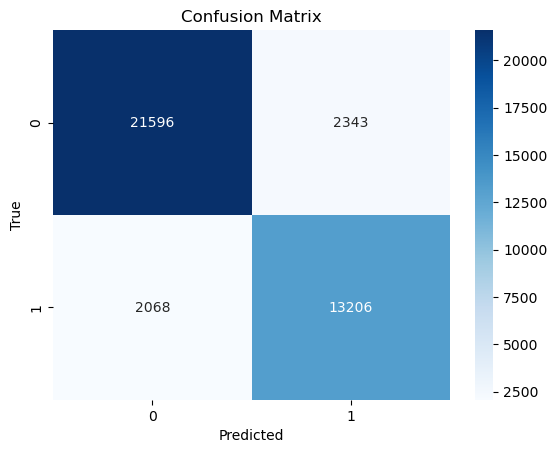

In [34]:
params_nn = {'hidden_layer_sizes': (30,30,30), 'activation': 'logistic', 'solver': 'lbfgs', 'max_iter': 500}
nn_classifier = MLPClassifier(random_state=42, **params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(nn_classifier, X_train, y_train, X_test, y_test)

### 4. Random Forest

Accuracy = 0.9299211996021728
ROC Area under Curve = 0.9289304332243825
Cohen's Kappa = 0.8534115736656722
Time taken = 28.413841009140015
              precision    recall  f1-score   support

         0.0    0.95089   0.93341   0.94207     23939
         1.0    0.89856   0.92445   0.91132     15274

    accuracy                        0.92992     39213
   macro avg    0.92473   0.92893   0.92670     39213
weighted avg    0.93051   0.92992   0.93009     39213



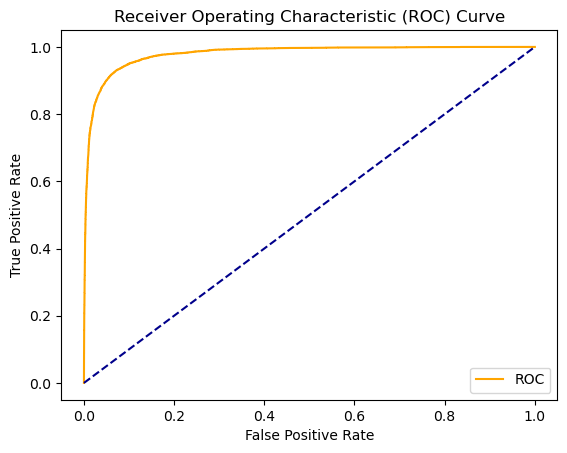

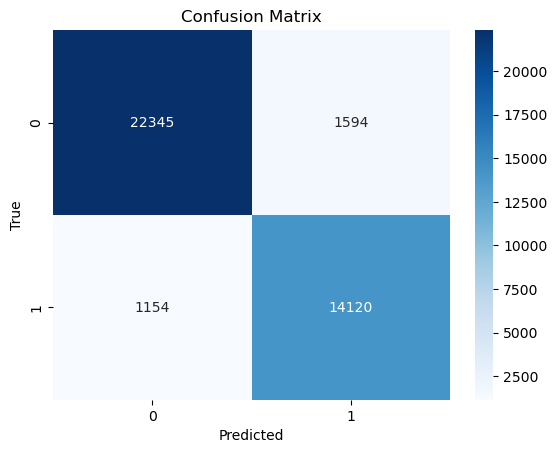

In [35]:
params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100,}
rf_classifier = RandomForestClassifier(random_state=42, **params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(rf_classifier, X_train, y_train, X_test, y_test)

### 5. Catboost

Accuracy = 0.9411419682248234
ROC Area under Curve = 0.9455971438317513
Cohen's Kappa = 0.8780642661200995
Time taken = 95.08404612541199
              precision    recall  f1-score   support

         0.0    0.97694   0.92544   0.95049     23939
         1.0    0.89205   0.96576   0.92744     15274

    accuracy                        0.94114     39213
   macro avg    0.93450   0.94560   0.93897     39213
weighted avg    0.94387   0.94114   0.94151     39213



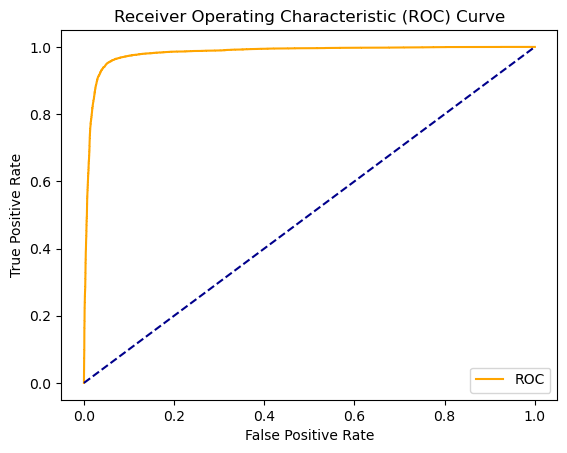

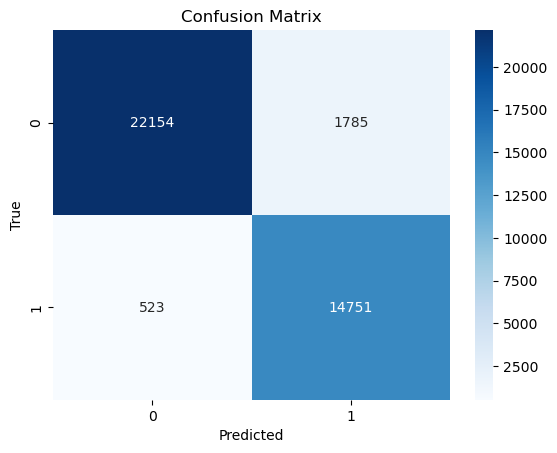

In [36]:
params_cb ={'iterations': 50, 'max_depth': 16}
cat_classifier = cb.CatBoostClassifier(random_state=42, **params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(cat_classifier, X_train, y_train, X_test, y_test, verbose=False)

### 6. XGBoost

Accuracy = 0.9567745390559254
ROC Area under Curve = 0.9579028632762498
Cohen's Kappa = 0.909715494787306
Time taken = 6.856518983840942
              precision    recall  f1-score   support

         0.0    0.97583   0.95280   0.96417     23939
         1.0    0.92866   0.96301   0.94552     15274

    accuracy                        0.95677     39213
   macro avg    0.95224   0.95790   0.95485     39213
weighted avg    0.95745   0.95677   0.95691     39213



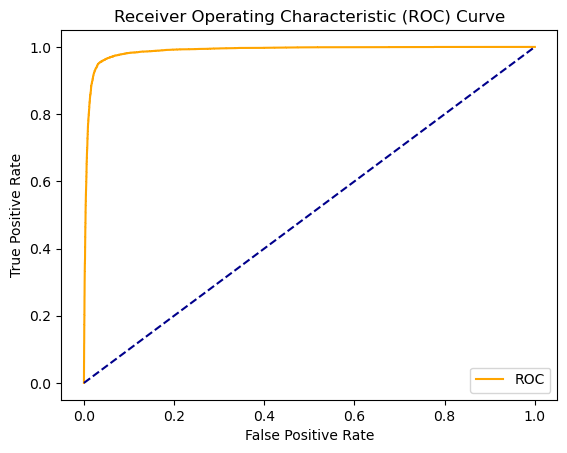

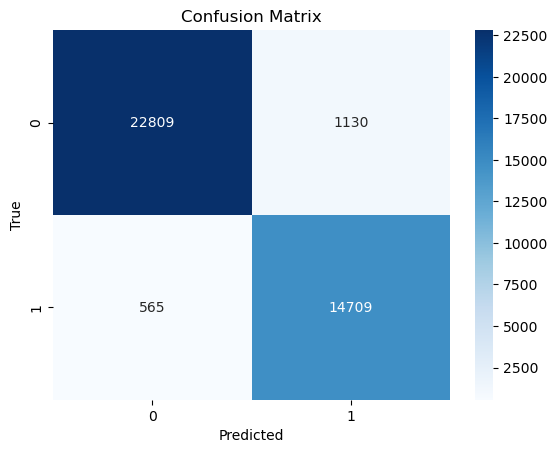

In [37]:
params_xgb ={'n_estimators': 500, 'max_depth': 16}
xgb_classifier = xgb.XGBClassifier(random_state=42, **params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(xgb_classifier, X_train, y_train, X_test, y_test)

## Plotting Decision Regions for all models

In [40]:
value = 1.80
width = 0.90

eclf = EnsembleVoteClassifier(clfs=[rf_classifier, cat_classifier, xgb_classifier], weights=[1, 1, 1], voting='soft')
X_list = imputed_data[["Sunshine", "Humidity9am", "Cloud3pm"]]
X = np.asarray(X_list, dtype=np.float32)
y_list = imputed_data["RainTomorrow"]
y = np.asarray(y_list, dtype=np.int32)

Learning rate set to 0.5
0:	learn: 0.5646323	total: 497ms	remaining: 24.4s
1:	learn: 0.5212696	total: 899ms	remaining: 21.6s
2:	learn: 0.5020532	total: 1.22s	remaining: 19.1s
3:	learn: 0.4905886	total: 1.51s	remaining: 17.4s
4:	learn: 0.4855219	total: 1.79s	remaining: 16.1s
5:	learn: 0.4805512	total: 2.08s	remaining: 15.3s
6:	learn: 0.4774544	total: 2.39s	remaining: 14.7s
7:	learn: 0.4740113	total: 2.68s	remaining: 14.1s
8:	learn: 0.4721295	total: 2.98s	remaining: 13.6s
9:	learn: 0.4705666	total: 3.3s	remaining: 13.2s
10:	learn: 0.4689523	total: 3.59s	remaining: 12.7s
11:	learn: 0.4670769	total: 3.87s	remaining: 12.3s
12:	learn: 0.4655621	total: 4.15s	remaining: 11.8s
13:	learn: 0.4641463	total: 4.45s	remaining: 11.4s
14:	learn: 0.4633445	total: 4.73s	remaining: 11s
15:	learn: 0.4622583	total: 5.01s	remaining: 10.6s
16:	learn: 0.4615388	total: 5.29s	remaining: 10.3s
17:	learn: 0.4604160	total: 5.57s	remaining: 9.9s
18:	learn: 0.4596080	total: 5.84s	remaining: 9.54s
19:	learn: 0.4587605

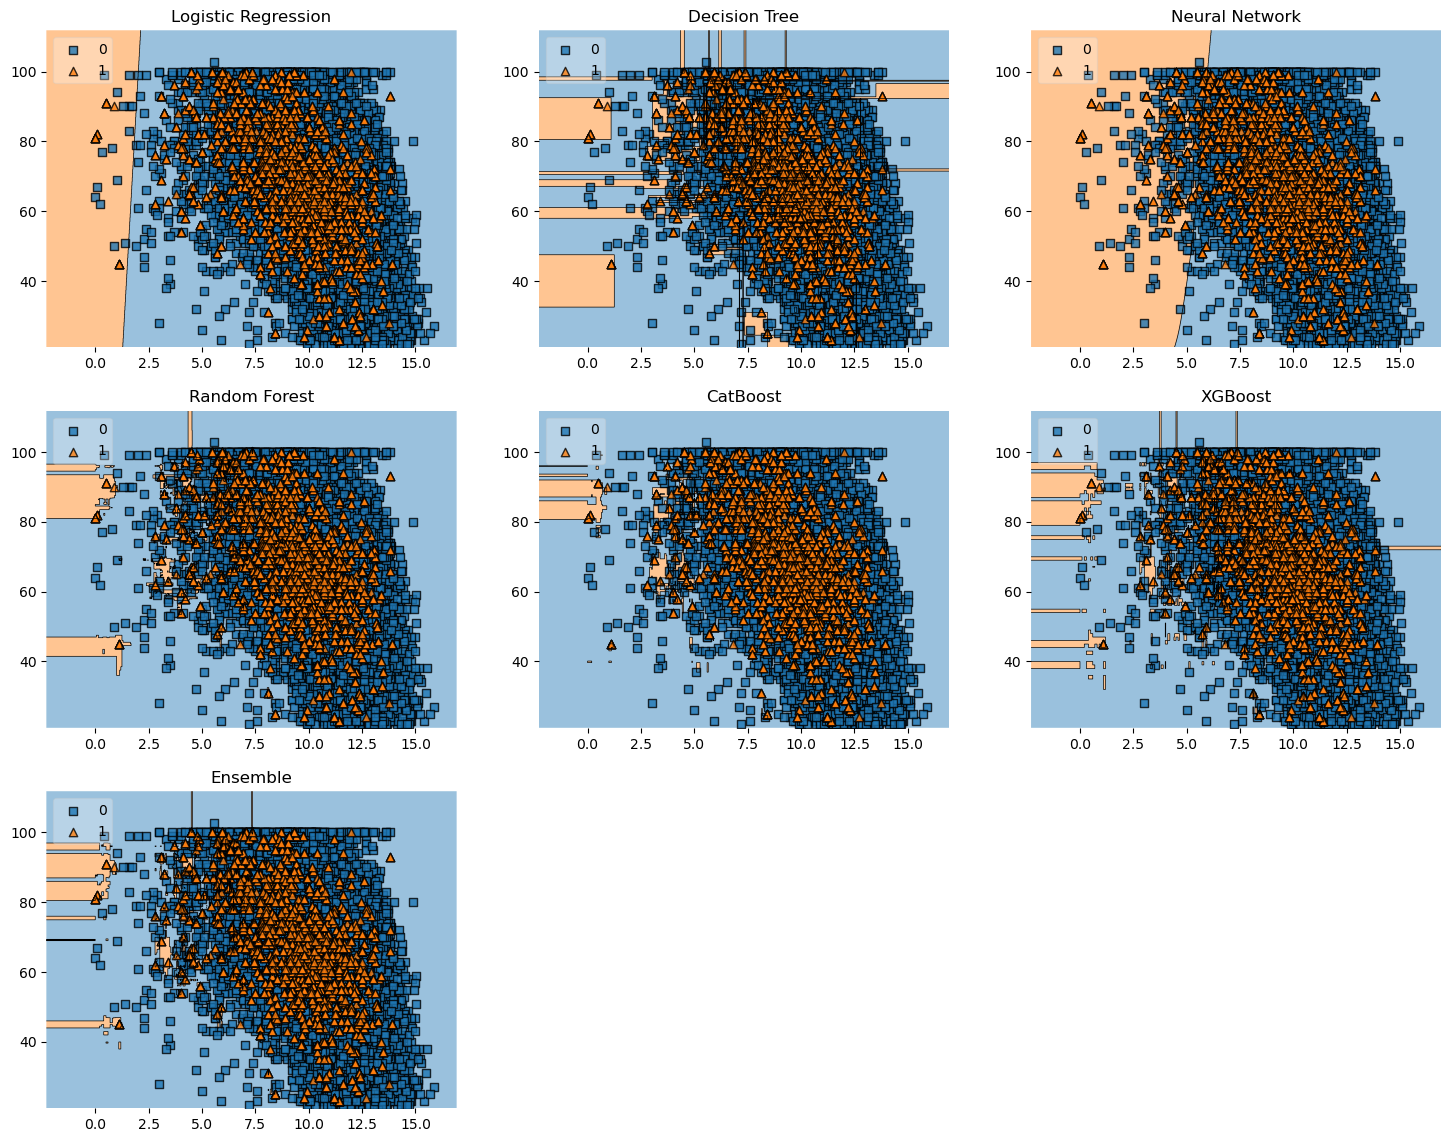

In [42]:
# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression','Decision Tree', 'Neural Network', 'Random Forest', 'CatBoost', 'XGBoost', 'Ensemble']

for clf, lab, grd in zip([lr_classifier, dt_classifier, nn_classifier, rf_classifier, cat_classifier, xgb_classifier, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, filler_feature_values={2: value}, filler_feature_ranges={2: width}, legend=2)
    plt.title(lab)

plt.show()

## Comparing Models

In [59]:
def plot_comparisions(title, color, compare, color2, compare2):
    fig, ax1 = plt.subplots(figsize=(12, 10))
    ax1.set_title(title, fontsize=13)
    ax1.set_xlabel('Model', fontsize=13)
    ax1.set_ylabel(compare, fontsize=13, color=color)
    ax2 = sns.barplot(x='Model', y=compare, data=data, palette='winter')
    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()
    ax2.set_ylabel(compare2, fontsize=13, color=color2)
    ax2 = sns.lineplot(x='Model', y=compare2, data=data, sort=True, color=color2)
    ax2.tick_params(axis='y', color=color2)
    plt.show()

In [47]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

In [48]:
data

Model  Accuracy   ROC_AUC  Cohen_Kappa  Time taken
0  Logistic Regression  0.786397  0.766889     0.543056    2.019777
1        Decision Tree  0.861883  0.858454     0.711696    0.457124
2       Neural Network  0.887512  0.883366     0.764243  238.738813
3        Random Forest  0.929921  0.928930     0.853412   28.413841
4             Catboost  0.941142  0.945597     0.878064   95.084046
5              XGBoost  0.956775  0.957903     0.909715    6.856519

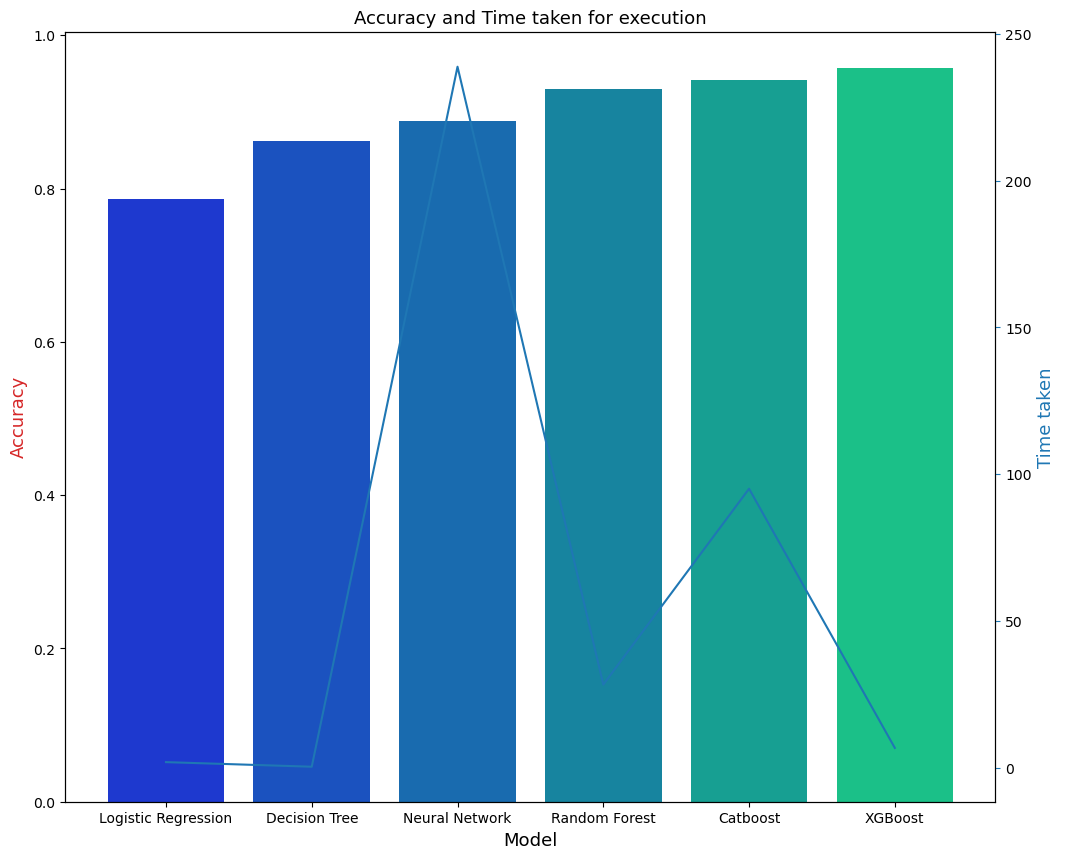

In [62]:
#Plotting Model Comparison: Accuracy and Time taken for execution
title = 'Accuracy and Time taken for execution'
color, color2 = 'tab:red', 'tab:blue'
compare, compare2 = 'Accuracy', 'Time taken'
plot_comparisions(title, color, compare, color2, compare2)

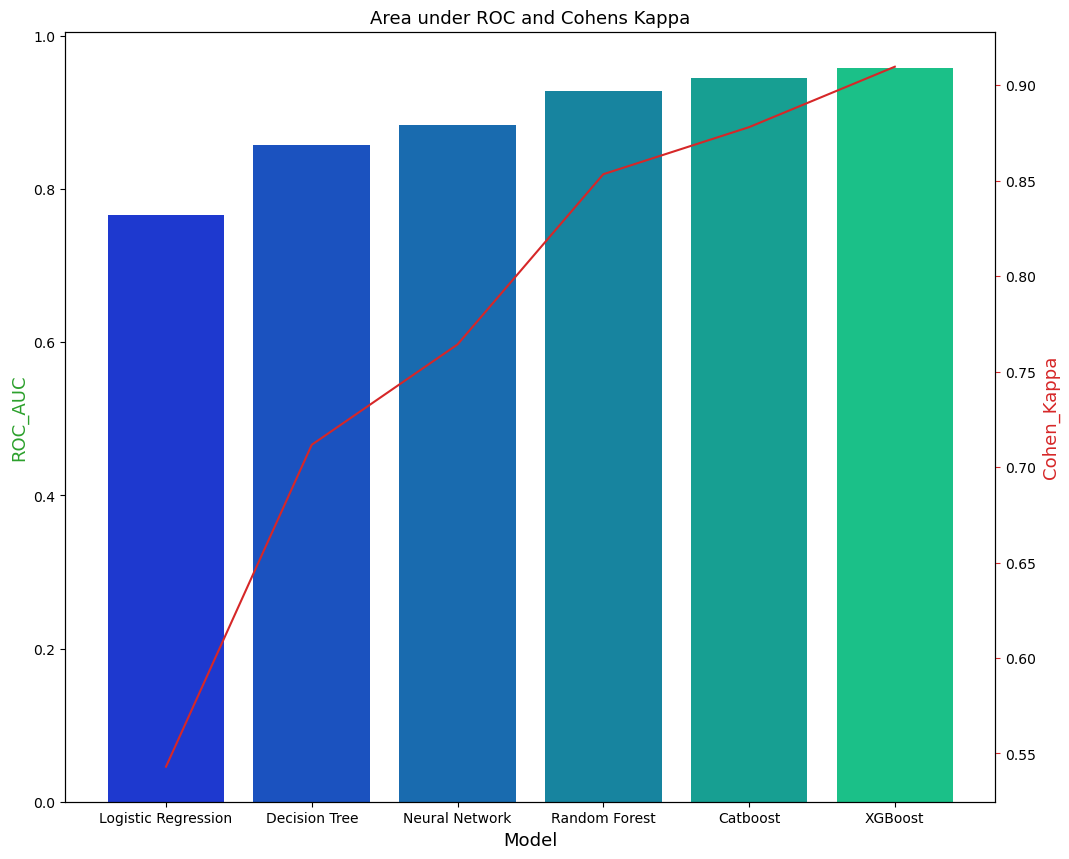

In [61]:
## Plotting Model Comparison: Area under ROC and Cohens Kappa
title = 'Area under ROC and Cohens Kappa'
color, color2 = 'tab:green', 'tab:red'
compare, compare2 = 'ROC_AUC', 'Cohen_Kappa'
plot_comparisions(title, color, compare, color2, compare2)